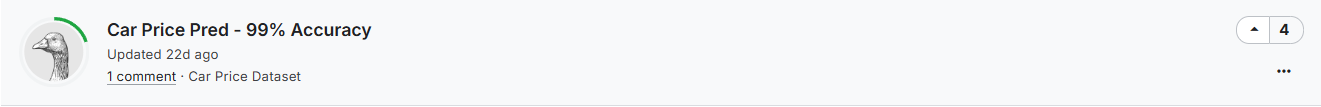

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Modeling
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
df = pd.read_csv('../car_price_dataset.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
X = df.drop(columns=['Price'], axis=1) 
y = df['Price']

In [4]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    [
        ('StandardScaler', numeric_transformer, num_features),
        ('OneHotEncoder', oh_transformer, cat_features)
    ]
)

In [5]:
X = preprocessor.fit_transform(X)

In [6]:
X.shape

(10000, 52)

In [7]:
# Separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 52), (2000, 52), (8000,), (2000,))

In [8]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

In [9]:
models = {
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'LinearRegression': LinearRegression(),
    'XGBRegressor': XGBRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}
model_list = []
r2_list = []
mse_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mse, model_train_mae, model_train_r2 = evaluate_model(model, X_train, X_train, y_train, y_train)
    model_test_mse, model_test_mae, model_test_r2 = evaluate_model(model, X_train, X_test, y_train, y_test)

    print(f'{list(models.keys())[i]}')
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_mse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R^2: {:.4f}'.format(model_train_r2))

    print('---------------------------------------------')

    print('Model performance for testing set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_mse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R^2: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)
    mse_list.append(model_test_mse)
    print('='*35)
    print('\n')

KNeighborsRegressor
Model performance for training set
- Root Mean Squared Error: 817747.4014
- Mean Absolute Error: 728.3626
- R^2: 0.9166
---------------------------------------------
Model performance for testing set
- Root Mean Squared Error: 1127307.0581
- Mean Absolute Error: 848.8747
- R^2: 0.8773


DecisionTreeRegressor
Model performance for training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R^2: 1.0000
---------------------------------------------
Model performance for testing set
- Root Mean Squared Error: 380357.5535
- Mean Absolute Error: 477.2165
- R^2: 0.9586


AdaBoostRegressor
Model performance for training set
- Root Mean Squared Error: 800590.9428
- Mean Absolute Error: 716.9512
- R^2: 0.9184
---------------------------------------------
Model performance for testing set
- Root Mean Squared Error: 775715.6423
- Mean Absolute Error: 701.3162
- R^2: 0.9156


LinearRegression
Model performance for training set
- Root Mean Squared Error: 8119.1

In [10]:
pd.DataFrame(list(zip(model_list, r2_list, mse_list)), columns=['Model', 'R^2', 'MSE']).sort_values(by='R^2', ascending=False)

,Model,R^2,MSE
3,LinearRegression,0.999541,4.213925e+03
6,Lasso,0.999541,4.217854e+03
5,Ridge,0.999541,4.218324e+03
4,XGBRegressor,0.993755,5.737476e+04
1,DecisionTreeRegressor,0.958602,3.803576e+05
2,AdaBoostRegressor,0.915571,7.757156e+05
0,KNeighborsRegressor,0.877304,1.127307e+06


In [11]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model: ", score)

Accuracy of the model:  99.95413570907378


<Axes: xlabel='Price'>

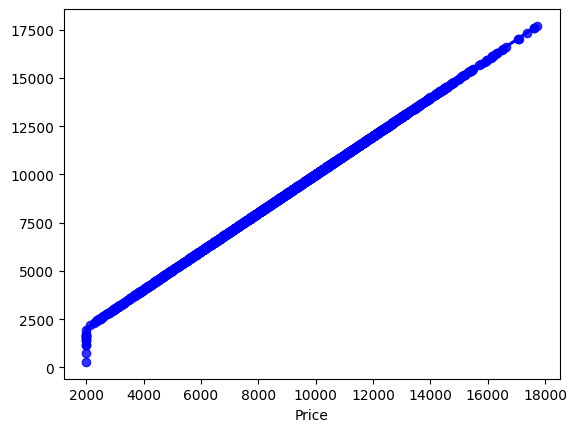

In [12]:
sns.regplot(x = y_test, y= y_pred, ci=None, color='blue')

In [13]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual,Predicted,Difference
6252,2000,1691.445781,308.554219
4684,11164,11149.127525,14.872475
1731,14630,14601.971472,28.028528
4742,7334,7348.983842,-14.983842
4521,10127,10146.193275,-19.193275
...,...,...,...
6412,4681,4710.409005,-29.409005
8285,12839,12812.074663,26.925337
7853,8124,8131.167197,-7.167197
1095,6709,6724.651517,-15.651517


In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [16]:
y_pred_gb = model_gb.predict(X_test)

In [17]:
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [18]:
print(f'Gradient Boosting - MAE: {mae_gb}, RMSE: {rmse_gb}, R2 Score: {r2_gb}')

Gradient Boosting - MAE: 169.54768091174307, RMSE: 216.6641857151175, R2 Score: 0.9948906910432499
